In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the cleaned datasets
train_clean = pd.read_csv('dataset/train_cleaned.csv')
test_clean = pd.read_csv('dataset/test_cleaned.csv')

Univariate Analysis

=== NUMERIC VARIABLES ANALYSIS ===

TEMPERATURE:
Mean: 24.899
Median: 24.697
Std: 11.782
Min: 0.000
Max: 60.000
Skewness: nan
Kurtosis: nan

IRRADIANCE:
Mean: 514.997
Median: 505.827
Std: 236.470
Min: 0.633
Max: 1537.810
Skewness: nan
Kurtosis: nan

HUMIDITY:
Mean: 50.042
Median: 50.211
Std: 28.705
Min: 0.011
Max: 99.995
Skewness: nan
Kurtosis: nan

PANEL_AGE:
Mean: 17.504
Median: 17.494
Std: 10.095
Min: 0.001
Max: 34.998
Skewness: nan
Kurtosis: nan

MAINTENANCE_COUNT:
Mean: 4.009
Median: 4.000
Std: 2.000
Min: 0.000
Max: 15.000
Skewness: nan
Kurtosis: nan

SOILING_RATIO:
Mean: 0.699
Median: 0.699
Std: 0.172
Min: 0.400
Max: 1.000
Skewness: nan
Kurtosis: nan

VOLTAGE:
Mean: 16.458
Median: 12.712
Std: 17.963
Min: 0.000
Max: 494.279
Skewness: nan
Kurtosis: nan

CURRENT:
Mean: 1.730
Median: 1.580
Std: 1.155
Min: 0.000
Max: 7.316
Skewness: nan
Kurtosis: nan

MODULE_TEMPERATURE:
Mean: 29.928
Median: 29.869
Std: 12.127
Min: 0.000
Max: 65.000
Skewness: nan
Kurtosis: nan

CLOUD_COVERAGE:
Mean: 4

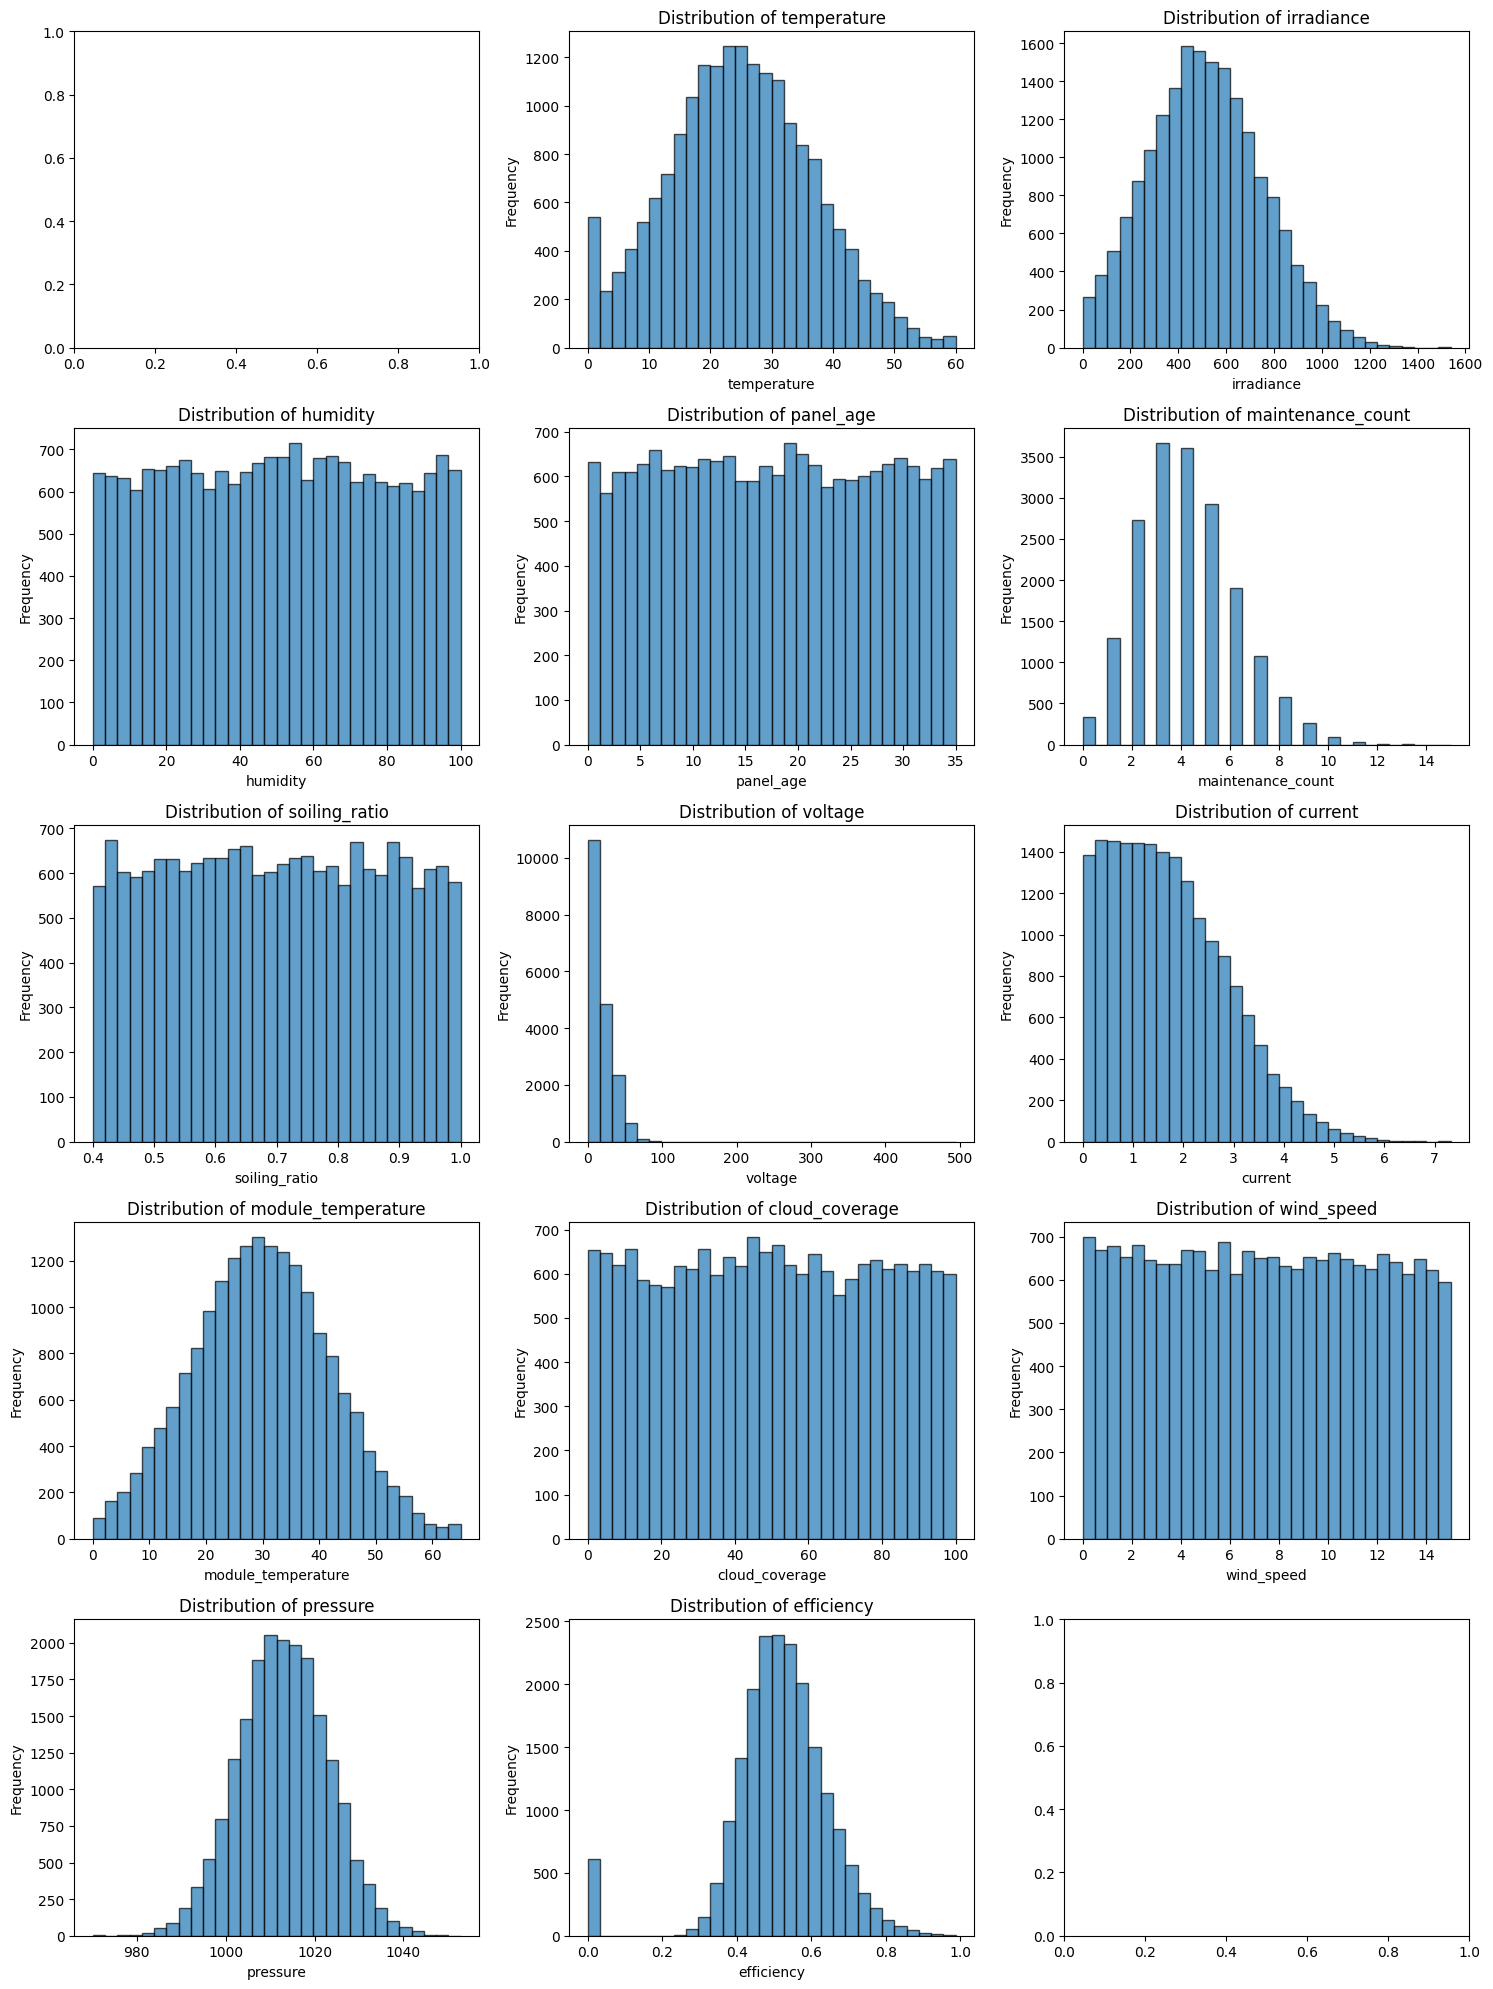


=== CATEGORICAL VARIABLES ANALYSIS ===

STRING_ID:
Unique values: 4
Value counts:
string_id
D4    4970
B2    4903
C3    4888
A1    4781
Name: count, dtype: int64

ERROR_CODE:
Unique values: 3
Value counts:
error_code
E00    5839
E01    4002
E02    3906
Name: count, dtype: int64

INSTALLATION_TYPE:
Unique values: 3
Value counts:
installation_type
tracking     4945
fixed        4887
dual-axis    4790
Name: count, dtype: int64


In [5]:
def comprehensive_univariate_analysis(df):
    """Perform comprehensive univariate analysis"""
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Numeric variables
    print("=== NUMERIC VARIABLES ANALYSIS ===")
    for col in numeric_cols:
        if col not in ['id']:
            print(f"\n{col.upper()}:")
            print(f"Mean: {df[col].mean():.3f}")
            print(f"Median: {df[col].median():.3f}")
            print(f"Std: {df[col].std():.3f}")
            print(f"Min: {df[col].min():.3f}")
            print(f"Max: {df[col].max():.3f}")
            print(f"Skewness: {stats.skew(df[col]):.3f}")
            print(f"Kurtosis: {stats.kurtosis(df[col]):.3f}")
    
    # Create comprehensive plots
    fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 20))
    axes = axes.ravel()
    
    for i, col in enumerate(numeric_cols):
        if col != 'id':
            axes[i].hist(df[col], bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Categorical variables
    print("\n=== CATEGORICAL VARIABLES ANALYSIS ===")
    for col in categorical_cols:
        print(f"\n{col.upper()}:")
        print(f"Unique values: {df[col].nunique()}")
        print("Value counts:")
        print(df[col].value_counts().head(10))

comprehensive_univariate_analysis(train_clean)

Feature Correlations with Efficiency (Target):
irradiance            0.554502
soiling_ratio         0.302725
current               0.259758
panel_age            -0.189465
voltage               0.144077
humidity             -0.064952
module_temperature   -0.051225
temperature          -0.046640
maintenance_count     0.018427
cloud_coverage       -0.009696
pressure             -0.006101
wind_speed           -0.003799
Name: efficiency, dtype: float64


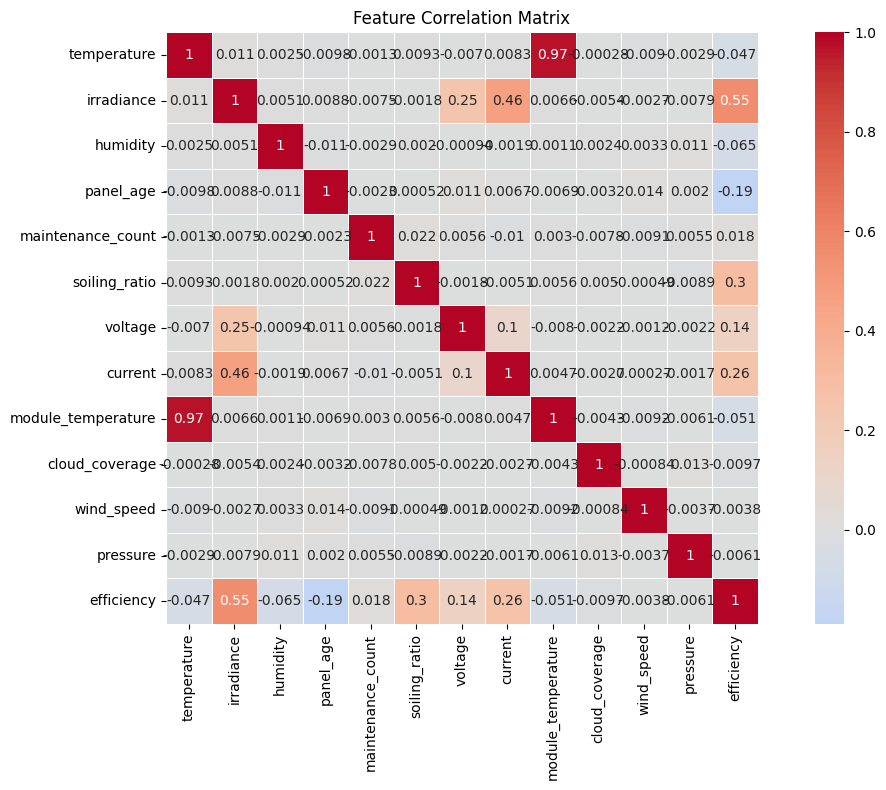

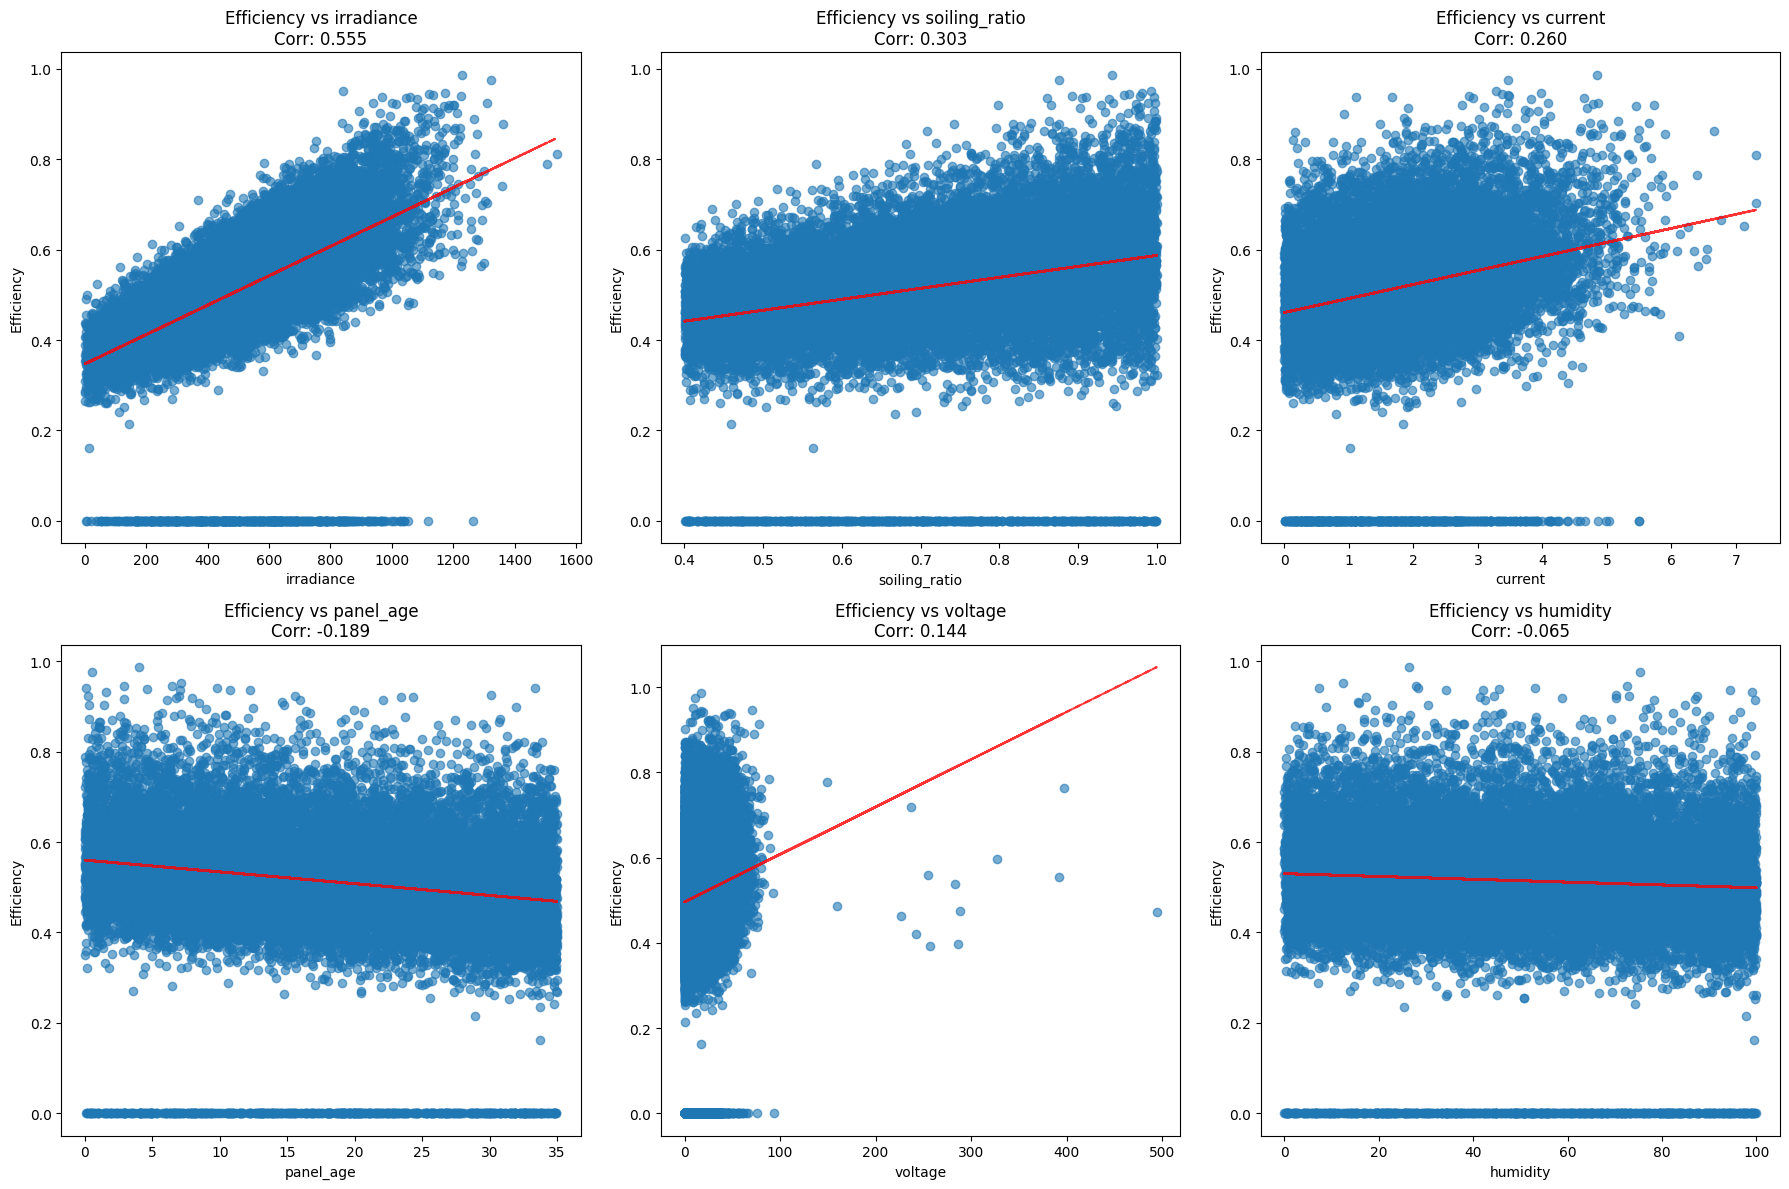

In [6]:
def analyze_target_relationships(df):
    """Analyze relationships between features and target variable"""
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in ['id', 'efficiency']]
    
    # Correlation analysis
    correlation_matrix = df[numeric_cols + ['efficiency']].corr()
    target_correlations = correlation_matrix['efficiency'].drop('efficiency').sort_values(
        key=abs, ascending=False
    )
    
    print("Feature Correlations with Efficiency (Target):")
    print(target_correlations)
    
    # Visualize correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Scatter plots for top correlated features
    top_features = target_correlations.head(6).index
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for i, feature in enumerate(top_features):
        axes[i].scatter(df[feature], df['efficiency'], alpha=0.6)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Efficiency')
        axes[i].set_title(f'Efficiency vs {feature}\nCorr: {target_correlations[feature]:.3f}')
        
        # Add trend line
        z = np.polyfit(df[feature].dropna(), 
                      df.loc[df[feature].notna(), 'efficiency'], 1)
        p = np.poly1d(z)
        axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()
    
    return target_correlations

target_correlations = analyze_target_relationships(train_clean)

=== FEATURE INTERACTIONS ANALYSIS ===
Highly correlated feature pairs (>0.7):
temperature - module_temperature: 0.969


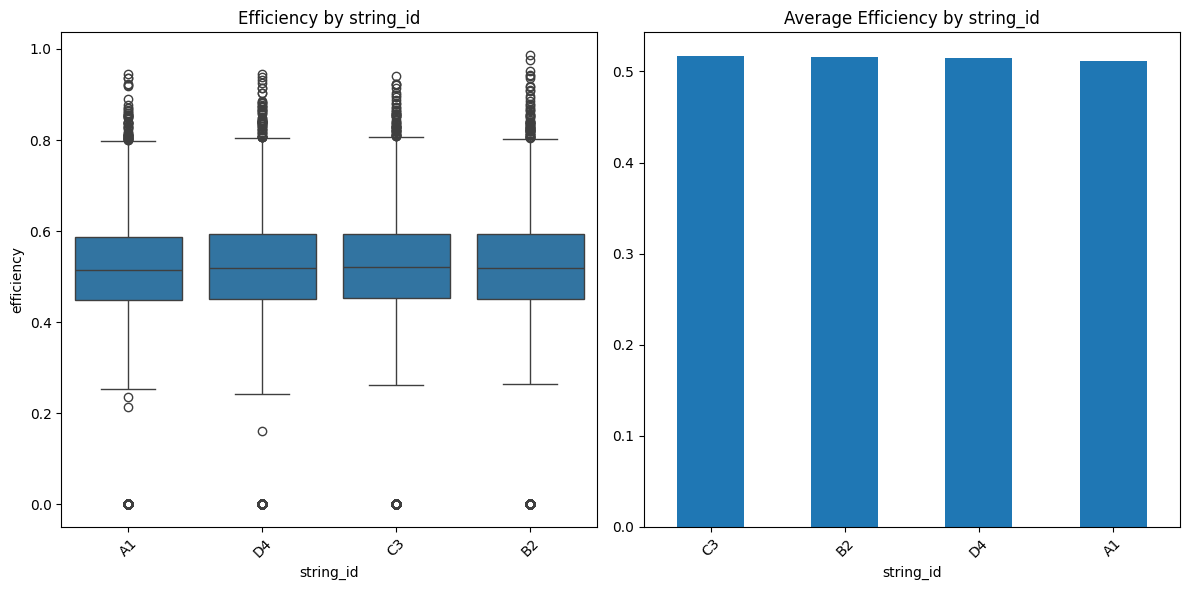

string_id - ANOVA F-statistic: 1.620, p-value: 0.182402


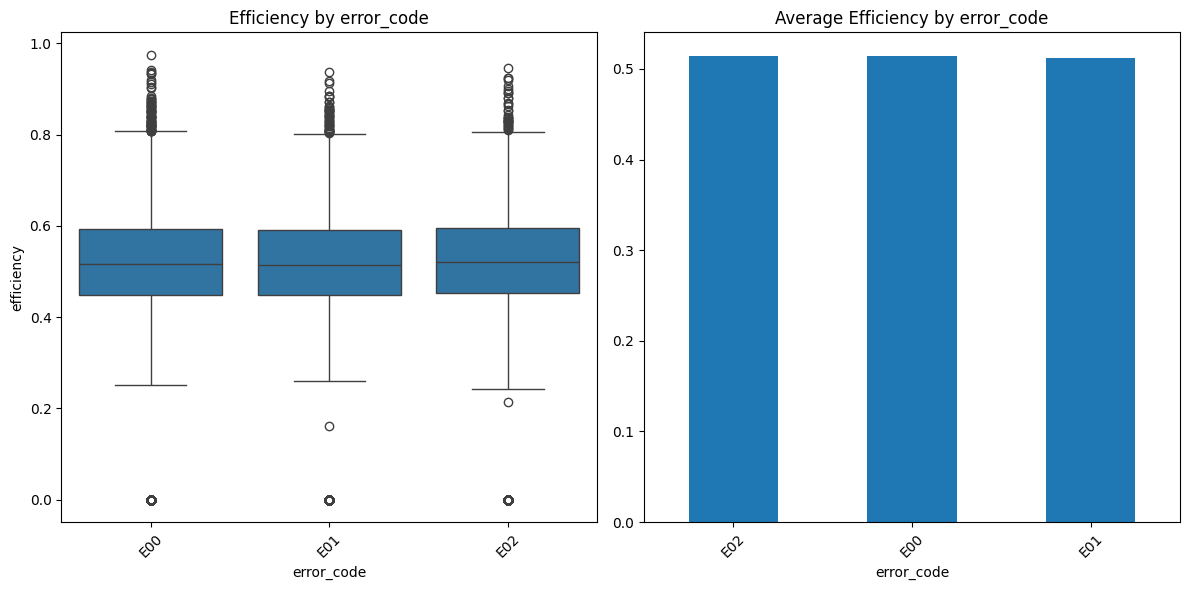

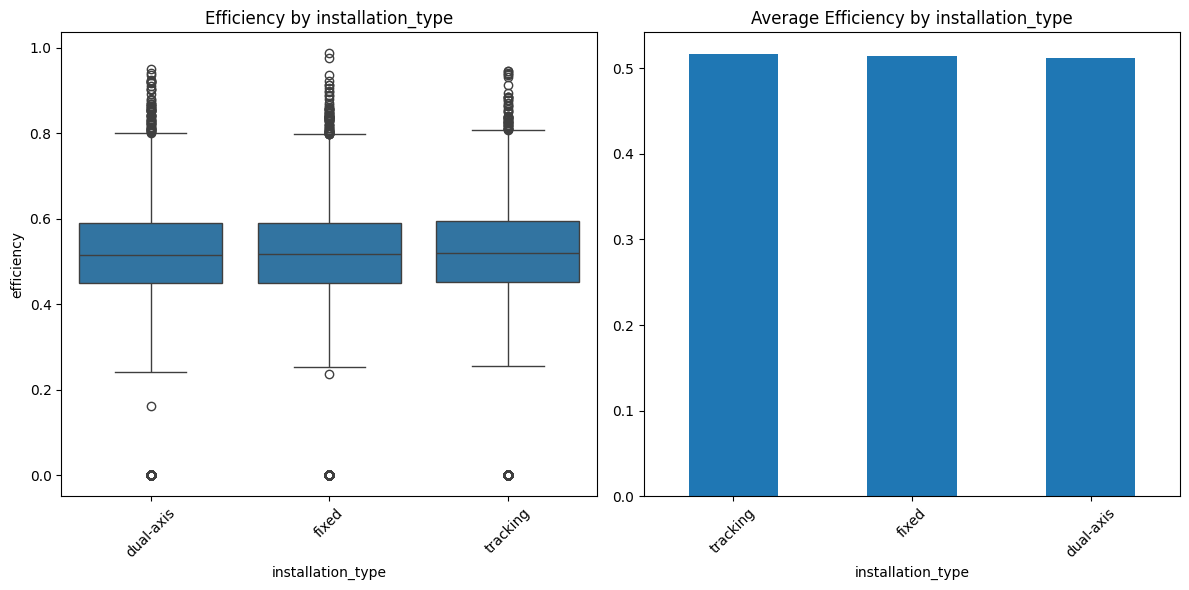

In [7]:
def multivariate_analysis(df):
    """Perform multivariate analysis to understand feature interactions"""
    
    # Feature interactions analysis
    print("=== FEATURE INTERACTIONS ANALYSIS ===")
    
    # Create interaction features for highly correlated pairs
    high_corr_pairs = []
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in ['id', 'efficiency']]
    
    corr_matrix = df[numeric_cols].corr()
    
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > 0.7:  # High correlation threshold
                high_corr_pairs.append((numeric_cols[i], numeric_cols[j], corr_val))
    
    print("Highly correlated feature pairs (>0.7):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
    
    # Analyze categorical variable impact on target
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for cat_col in categorical_cols:
        if cat_col in df.columns:
            plt.figure(figsize=(12, 6))
            
            plt.subplot(1, 2, 1)
            sns.boxplot(data=df, x=cat_col, y='efficiency')
            plt.xticks(rotation=45)
            plt.title(f'Efficiency by {cat_col}')
            
            plt.subplot(1, 2, 2)
            category_means = df.groupby(cat_col)['efficiency'].mean().sort_values(ascending=False)
            category_means.plot(kind='bar')
            plt.title(f'Average Efficiency by {cat_col}')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()
            
            # Statistical test for significance
            categories = df[cat_col].unique()
            if len(categories) > 1:
                groups = [df[df[cat_col] == cat]['efficiency'].dropna() for cat in categories]
                if len(groups) >= 2 and all(len(group) > 0 for group in groups):
                    f_stat, p_value = stats.f_oneway(*groups)
                    print(f"{cat_col} - ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.6f}")

multivariate_analysis(train_clean)